In [14]:

#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
#Import packages and libraries needed and give them shortcut names
#from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def plot(x,y,dy):
   
    #----------------------------------------------#
    #Don't need to change anything in this section!

    #Find the intercept and slope, b and m, from Python's polynomial fitting function
    b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

    #Write the equation for the best fit line based on the slope and intercept
    fit = b+m*x

    #Calculate the error in slope and intercept 
    #def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
    def Delta(x, dy):
        D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
        return D

    D=Delta(x, dy)

    dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
    db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

    #Calculate the "goodness of fit" from the linear least squares fitting document
    def LLSFD2(x,y,dy):
        N = sum(((y-b-m*x)/dy)**2)
        return N

    N = LLSFD2(x,y,dy)

    #-----------------------------------------------------------------------#
    #Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
    plt.figure(figsize=(15,10))

    plt.plot(x, fit, color='green', linestyle='--')
    plt.scatter(x, y, color='blue', marker='o')


    #create labels  YOU NEED TO CHANGE THESE!!!
    plt.xlabel('Tangent(Theta)')
    plt.ylabel('I (mA)')
    plt.title('I vs Tangent(theta)')

    plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars

    plt.annotate('Slope (mA) = {value:.{digits}E}'.format(value=m, digits=2),
                 (0.05, 0.9), xycoords='axes fraction')

    plt.annotate('Error in Slope (mA) = {value:.{digits}E}'.format(value=dm, digits=1),
                 (0.05, 0.85), xycoords='axes fraction')

    plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
                 (0.05, 0.80), xycoords='axes fraction')

    plt.show()




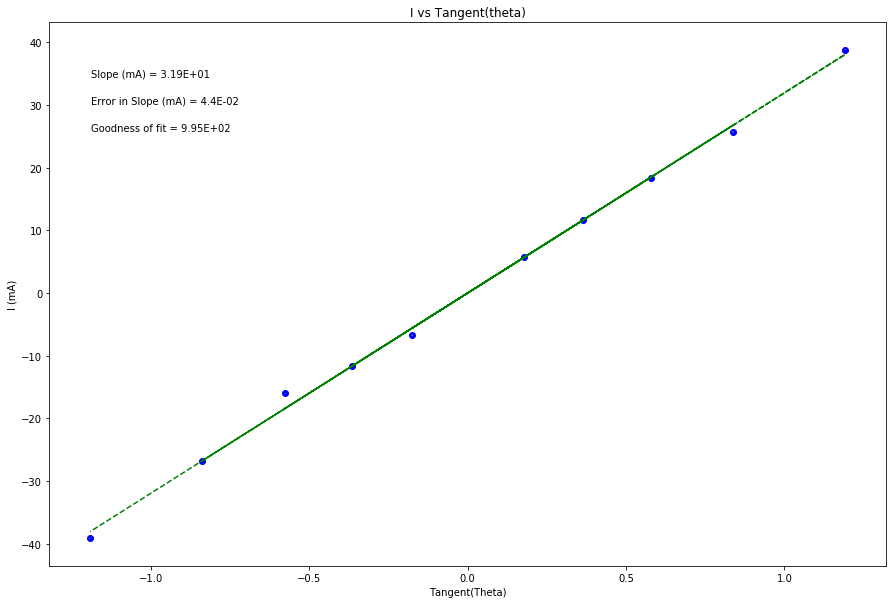

B_E 100 = 1.838840470633292e-05 ± 2.5083192523197445e-07 T


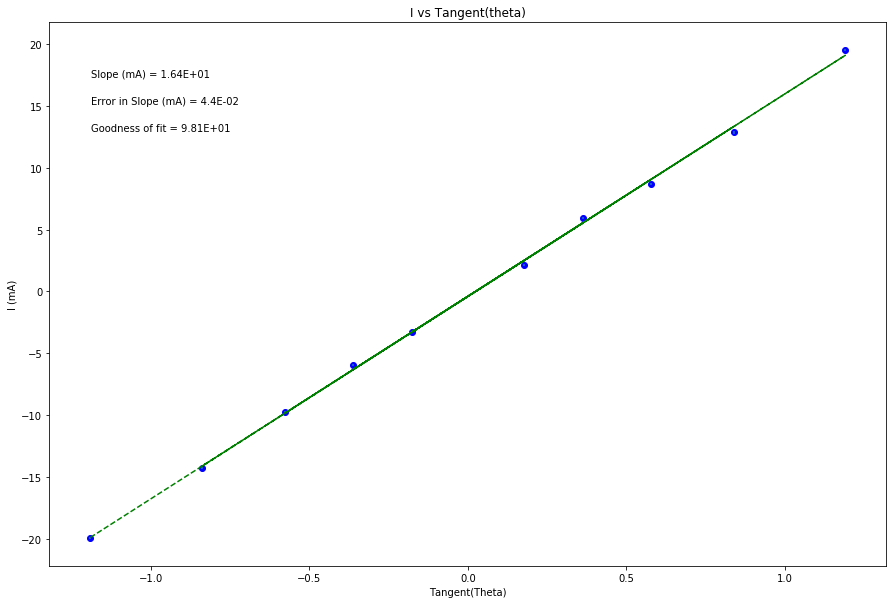

B_E 200 = 1.890719982343949e-05 ± 2.039578596091254e-07 T


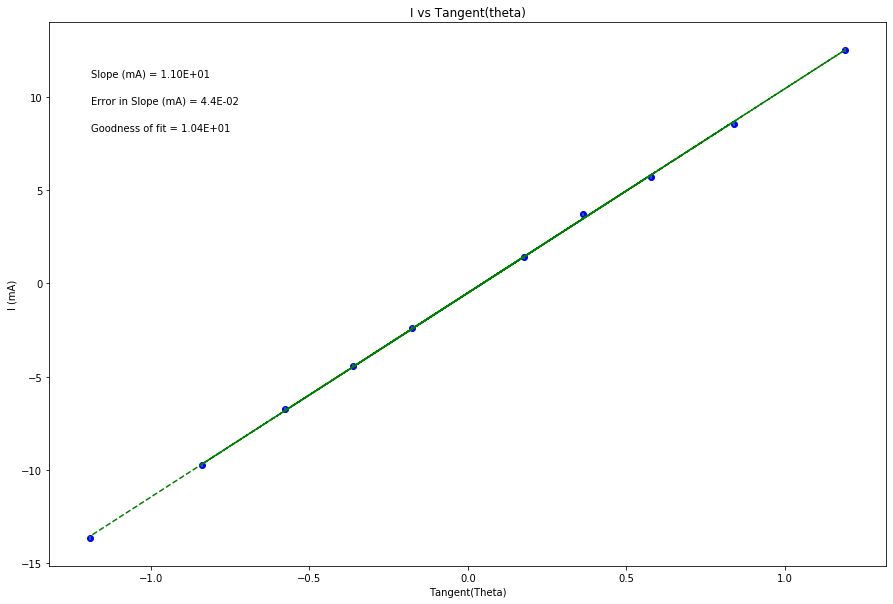

B_E 300 = 1.902248762724095e-05 ± 2.0066615674059734e-07 T


In [15]:
dI = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]) #mA
dtheta = 1
dr = 0.001
dn = 1

theta = np.array([10,-10,20,-20,30,-30,40,-40,50,-50])
I100 = np.array([5.8,-6.7,11.6,-11.6,18.4,-16,25.7,-26.8,38.8,-39.1])

x = np.tan(np.radians(theta))
plot(x,I100,dI)

B_E100 = b_E(100,31.9 / 1000)
print("B_E 100 =", B_E100, '±', dB_E100, "T")

I200 = np.array([2.16,-3.30,5.96,-5.97,8.71,-9.74,12.88,-14.27,19.56,-19.97])
plot(x,I200,dI)

B_E200 = b_E(200,16.4 / 1000)
print("B_E 200 =", B_E200, '±', dB_E200, "T")

I300 = np.array([1.4,-2.4,3.71,-4.45,5.73,-6.74,8.56,-9.74,12.55,-13.68])
plot(x,I300,dI)

B_E300 = b_E(300,11 / 1000)
print("B_E 300 =", B_E300, '±', dB_E300, "T")

In [16]:
def b_E(n,slope):
    u = 4 * np.pi * 10 ** -7
    r = 0.109
    return(((u * n) / (2 * r)) * slope)

r = 0.109

def ruleFour(Q,consts,deltas,vals):
    dQ = np.abs(Q)*np.sqrt(np.sum((consts*deltas/vals)**2))
    return dQ

#100
const = np.array([1,-1,1])
delta = np.array([dn,dr,4.4E-2/1000])
val = np.array([100,r,31.9/1000])

dB_E100 = ruleFour(B_E100,const,delta,val)
print(dB_E100,'T')

#200
const = np.array([1,-1,1])
delta = np.array([dn,dr,4.4E-2/1000])
val = np.array([200,r,16.4/1000])

dB_E200 = ruleFour(B_E200,const,delta,val)
print(dB_E200,'T')

#300
const = np.array([1,-1,1])
delta = np.array([dn,dr,4.4E-2/1000])
val = np.array([300,r,11/1000])

dB_E300 = ruleFour(B_E300,const,delta,val)
print(dB_E300,'T')



2.5083192523197445e-07 T
2.039578596091254e-07 T
2.0066615674059734e-07 T
